In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L2Nsb3VkL3Byb2plY3QvTU5JU1Q='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
# globals()["__spec__"] = None

/tmp/ipykernel_1159/45523360.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/opt/python/3.8.17/lib/python3.8/importlib/_bootstrap.py": 1715086068.0, "/opt/python/3.8.17/lib/python3.8/importlib/_bootstrap_external.py": 1715086068.0, "/opt/python/3.8.17/lib/python3.8/codecs.py": 1715086067.0, "/opt/python/3.8.17/lib/python3.8/encodings/aliases.py": 1715086068.0, "/opt/python/3.8.17/lib/python3.8/encodings/__init__.py": 1715086068.0, "/opt/python/3.8.17/lib/python3.8/encodings/utf_8.py": 1715086068.0, "/opt/python/3.8.17/lib/python3.8/encodings/latin_1.py": 1715086068.0, "/opt/python/3.8.17/lib/python3.8/abc.py": 1715086067.0, "/opt/python/3.8.17/lib/python3.8/io.py": 1715086067.0, "/opt/python/3.8.17/lib/python3.8/stat.py": 1715086067.0, "/opt/python/3.8.17/lib/python3.8/_collections_abc.py": 1715086067.0, "/opt/python/3.8.17/lib/python3.8/genericpath.py": 1715086067.0, "/opt/python/3.8.17/lib/python3.8/posixpath.py": 1715086067.0, "/opt/python/3.8.17/lib/python3.8/os.py": 1715086067.0, "/opt/python/3.8.17/lib/python3.8/_sitebuiltins.py": 1715086067.0, "/opt/p

In [2]:
#| label: imports

import networkx as nx
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

import graphlearning as gl  # for get_Gaussian_weight_matrix
import igraph as ig         # for get_metric_backbone_igraph
from sklearn.cluster import SpectralClustering
from sklearn.metrics import adjusted_rand_score
import scipy.sparse
import numpy as np

2024-10-18 11:33:11.486203: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-18 11:33:11.527460: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-18 11:33:11.528359: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2024-10-18 11:33:12.420246: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
#| label: global variables
global_SEED = 42
SC = SpectralClustering(n_clusters=10, affinity='precomputed')

In [4]:
#| label: def_get_Gaussian_weight_matrix

def get_Gaussian_weight_matrix(X, n_neighbors):
    Z = gl.weightmatrix.knn(data=X, k=n_neighbors)  # Gaussian similarity measure
    A = (Z + Z.T) / 2
    return A

In [5]:
#| label: def_get_metric_backbone_igraph

def get_metric_backbone_igraph(D):
    """
     :param D: networkx distance graph (with weight and proximity edge attribute)
     :return: Networkx Metric Backbone subgraph of D
    """
    D_ig = ig.Graph.from_networkx(D)
    distances = D_ig.distances(weights='weight')

    G = nx.Graph(D)
    G.remove_edges_from([(x, y) for x, y, w in G.edges.data('weight') if w > distances[x][y]])
    return G

In [6]:
#| label: community_detection_on_Euclidean_graphs_FUNCTIONS

def euclidean_distance(tuple_1, tuple_2):
    return np.linalg.norm(np.array(tuple_1) - np.array(tuple_2))


def φ(R):
    return lambda r: 1 if r <= R else 0


def f(f_r):
    return lambda G_distance, u_idx, v_idx: f_r(euclidean_distance(tuple_1=G_distance.nodes[u_idx]['pos'], tuple_2=G_distance.nodes[v_idx]['pos']))
  

def indicator(condition):
    return 1 if condition else 0
  

def make_F(f_in, f_out):
    return lambda G, u_idx, v_idx: indicator(G.nodes[u_idx]['community'] == G.nodes[v_idx]['community']) * f_in(G, u_idx, v_idx) + (1 - indicator(G.nodes[u_idx]['community'] == G.nodes[v_idx]['community'])) * f_out(G, u_idx, v_idx)


def make_F_from_R(R1, R2):
    return make_F(f(φ(R1)), f(φ(R2)))

In [7]:
def produce_distance_graph(X_train, y_train, n_neighbors, SEED=global_SEED):
  
    rng = np.random.default_rng(SEED)
    
    n = len(X_train)  # n_nodes
  
    G = nx.Graph()
    
    d = {i: X_train[i] for i in range(n)}
    
    G.add_nodes_from(d.keys())
    
    nx.set_node_attributes(G, d, 'pos')
    my_d = {i: y_train[i] for i in range(n)}
    
    nx.set_node_attributes(G, {i: y_train[i] for i in range(n)}, 'community')

    # edges_to_add = [(u_idx, v_idx) for u_idx in range(n) for v_idx in range(u_idx + 1, n) if F(G, u_idx, v_idx) == 1]
    # 
    # G.add_edges_from(edges_to_add)
    # 
    # 
    # 
    # if framework == 'gaussian':
    #     nx.set_node_attributes(G, {node: 1 if node + 1 > n else 0 for node in G.nodes}, 'community')
    # 
    #     col_slice = slice(1, samples.shape[1] + 1)
    
    W = get_Gaussian_weight_matrix(X_train, n_neighbors)

    for i in range(n):
        for j in range(i + 1, n):
            w = W[i, j]
            if w > 0:
                G.add_edge(i, j, weight=1 / w - 1)

    return G


In [8]:
#| label: inter_and_intra_community_proportion_functions


def get_inter_proportion(G):
  
  nominator = 0
  
  for u, v in G.edges():
    if G.nodes[u]['community'] != G.nodes[v]['community']:
      nominator += 1
      
  denominator = G.number_of_edges()
      
  res = nominator / denominator
  
  return res


def get_intra_proportion(G):
  return 1 - get_inter_proportion(G)

In [9]:
#| label: def_get_similarity_def_draw


def get_similarity(X_train_flat, n_neighbors, true_labels, b_original=True, MB=None):
  
    A = None
    
    if b_original:
        A = get_Gaussian_weight_matrix(X_train_flat, n_neighbors)
    else:
        A = nx.adjacency_matrix(MB, nodelist=[i for i in range(MB.number_of_nodes())], weight='proximity')
        A = scipy.sparse.csr_matrix(A)
        

    pred_labels = SC.fit_predict(A)
    
    print(max(pred_labels))
    print(pred_labels[:10])
    print(true_labels[:10])
    print()
    
    similarity  = adjusted_rand_score(true_labels, pred_labels)
    
    return similarity


def get_similarities(G, MB, X_train_flat, n_neighbors, n_clusters, affinity='precomputed'):
  
    pos = nx.get_node_attributes(G, 'pos')  # Extract node positions
    
    true_labels = list(nx.get_node_attributes(G, 'community').values())

    
      
    similarity_original = get_similarity(X_train_flat, n_neighbors, true_labels)
    
    similarity_mb = get_similarity(
      X_train_flat=None,
      n_neighbors=None,
      true_labels=true_labels,
      b_original=False,
      MB=MB
    )



    return similarity_original, similarity_mb
  

def print_similarities(G, MB, X_train_flat, n_neighbors, n_clusters, affinity='precomputed'):
    similarity_original, similarity_mb = get_similarities(G, MB, X_train_flat, n_neighbors, n_clusters, affinity)
    print(f'Original SC ARI: {similarity_original * 100:.2f}%')
    print(f'Metric Backbone SC ARI: {similarity_mb * 100:.2f}%')

60000


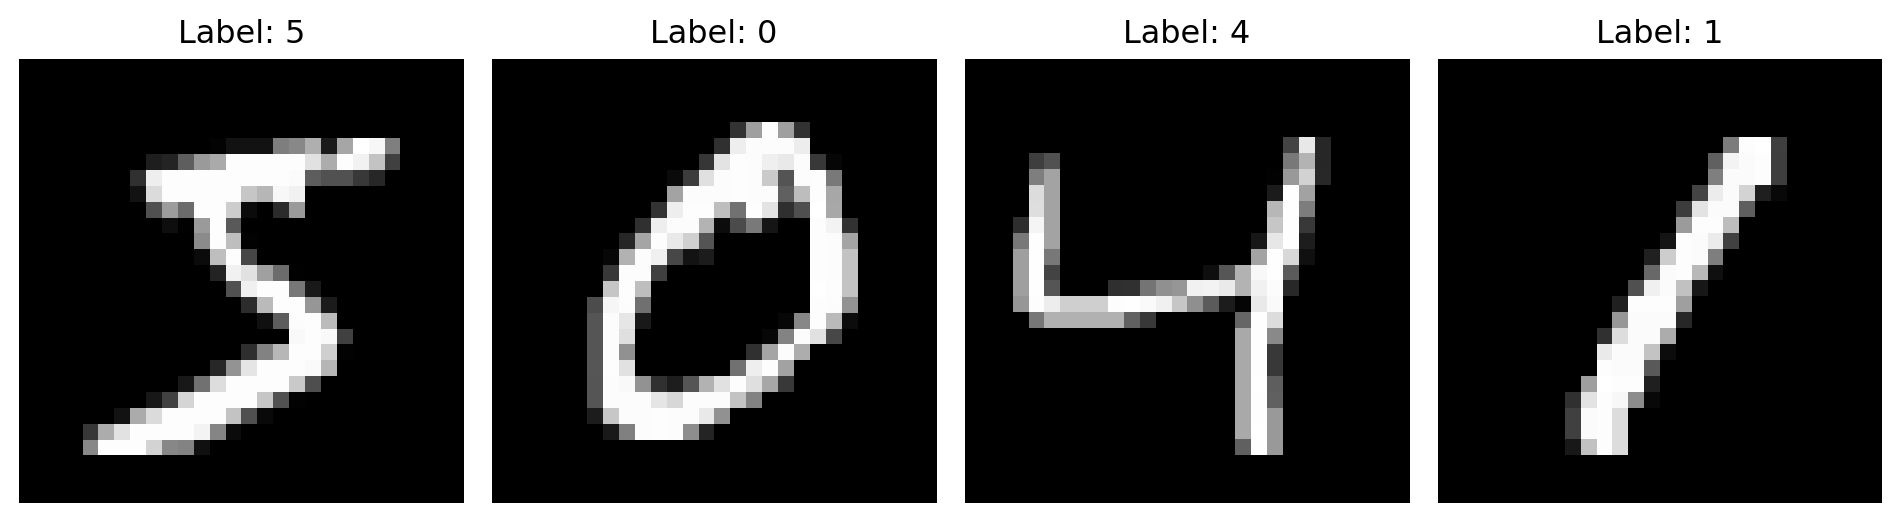

In [10]:
n_images = 1000

# Load the MNIST dataset
(X_train, y_train), (_, _) = mnist.load_data()  # X_train is 28x28=784 <class 'numpy.ndarray'>
print(len(X_train))

X_train = X_train[:n_images] / 255.0

# Normalization => maximum euclidean distance between two images is:
# sqrt(\sum_{i=1}^{784} (1 - 0)^2) = sqrt(784) = 28.
# We now choose R1 & R2 with this in mind.

F = make_F_from_R(R1=12, R2=8)

y_train = y_train[:n_images]

# Print 4 images in a row
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [11]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
#print(X_train_flat[0])

In [12]:
#| label: test produce_distance_graph

G = produce_distance_graph(X_train_flat, y_train, n_neighbors=500)

In [13]:
#| label: draw the graph
# col_slice = slice(1, samples.shape[1] + 1)
# 
W = get_Gaussian_weight_matrix(X=X_train_flat, n_neighbors=500)
# 
edges = list(G.edges())

# print(f'number of edges: {len(edges)}')

weights = {(u, v): 1 / W[u, v] - 1 if W[u, v] > 0 else float('inf') for u, v in edges}

nx.set_edge_attributes(G, weights, 'weight')

# print(f'edge attributes: {G.edges.data()}')
# Get a list of all edge attribute names
edge_attributes = list(next(iter(G.edges(data=True)))[2].keys())
#print("Edge Attributes:", edge_attributes)
 
mb_igraph = get_metric_backbone_igraph(G)

In [14]:
#| label: remove isolated nodes

isolated_nodes = list(nx.isolates(G))
G.remove_nodes_from(isolated_nodes)
mb_igraph.remove_nodes_from(isolated_nodes)


for elt in isolated_nodes:
    print(f'Isolated node: {elt}')

In [15]:
#| label: print the results

print(f'Original number of edges: {G.number_of_edges()}')
print(f'Original inter-proportion: {get_inter_proportion(G) * 100:.2f}%\n')

print(f'Metric Backbone number of edges: {mb_igraph.number_of_edges()}')
print(f'Metric Backbone inter-proportion: {get_inter_proportion(mb_igraph) * 100:.2f}%\n')

print('--------------------------')

print_similarities(G, mb_igraph, X_train_flat, n_neighbors=500, n_clusters=2, affinity='precomputed')


Original number of edges: 323275
Original inter-proportion: 86.47%

Metric Backbone number of edges: 12140
Metric Backbone inter-proportion: 53.44%

--------------------------


9
[2 3 0 9 0 4 4 2 4 4]
[5, 0, 4, 1, 9, 2, 1, 3, 1, 4]



9
[6 2 1 3 1 4 9 6 9 0]
[5, 0, 4, 1, 9, 2, 1, 3, 1, 4]

Original SC ARI: 25.26%
Metric Backbone SC ARI: 17.03%
